# Vehicle detection and counting ystem using OpenCV

### Overview
In this article we will be working to code a vehicle counting and detection system and it will be enough to work for both the images or the video, for the same we will be using OpenCV for doing all the image processing operations and for classification the car and bus haar cascade classifier for detecting and counting the cars and buses having said that you can also make your own haar cascade classifier.

### Scope
1. Helps traffic police : Vehicle detection and counting system could be very helpful for the traffic police because everything they can monitor from one place only like how many vehicles have crossed this toll and which vehicle.
2. Maintaining records : It is very hard for some individuals to keep a record of all the vehicles with them because the vehicles are passing by in the real time and it's not like that one is watching the video and they can pause it and have a note of it so to remove this limitation this application can be very well versed to attain the time saving quality as well along with being automated.
3. Managing high traffic: As this application can be planted any where as it only requires a camera or some wires (for establishinhg the connectivity with the main system) hence, if the traffic is high at some place then from that area an officer can monitor it and forward the information to next toll officer so that he/she could be prepared beforehand.

Importing required libraries.

In [1]:
# Import libraries
from PIL import Image
import cv2
import numpy as np
import requests  

Next we will fetch the image from the internet that we will be working on. We will then resize the image and convert it into a numpy array.

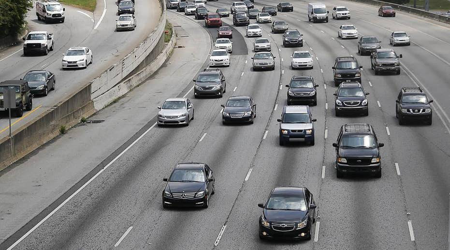

In [2]:
# Reading image form url
image = Image.open(requests.get('https://a57.foxnews.com/media.foxbusiness.com/BrightCove/854081161001/201805/2879/931/524/854081161001_5782482890001_5782477388001-vs.jpg', stream=True).raw)
image = image.resize((450,250))
image_arr = np.array(image)
image

Now in order to get better output, we will perform some transformations on the image. Here we wil convert the image into grayscale. 

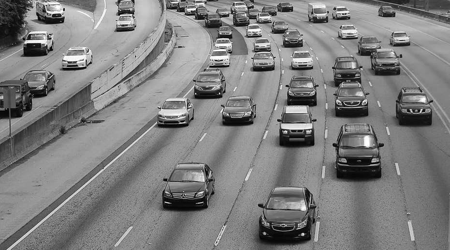

In [3]:
grey = cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

Next we will apply GaussianBlur to remove the noise from the image. Gaussian blur is one of the techniques of image processing and it is widely used in graphics designing too for reducing the noise and smoothing the image so that for further preprocessing it will generate better output. Along with reducing the noise in the image Gaussian blur technique also reduce the details of the image. Here for applying this preprocessing technique we will be using GaussianBlur function().

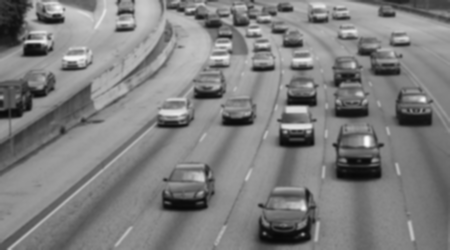

In [4]:
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

Here we will dilate image. Dilation is one of the morphological technique where we try to fill the pixels with the element also known as kernels (structured element) to fill the missing parts of the images whenever needed.
Note : It is just opposite of erosion. 

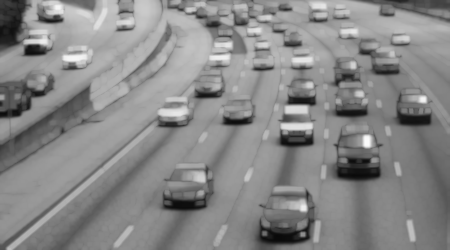

In [5]:
dilated = cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilated)

Now we will perform Morphology transformation with kernel. Here we are using morphologyEx technique which tells the function that on which image the image processing operations are need to be done and second argument is about what operations are need to be done 
You may need elliptical/circular shaped kernels. To implement the morphologyEx method using OpenCV we will be using the get structuring element method.

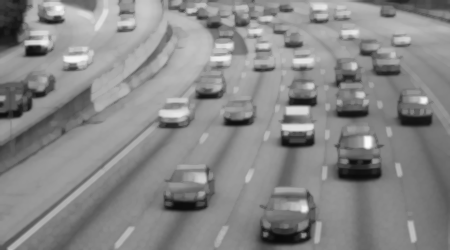

In [6]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 
Image.fromarray(closing)

Now we need car cascade to detect cars. So, we first need to upload them to collab (if you are doing it in collab if you are doing it in the local machine then simply add the cascade files in the same folder) and then specify the path to car_cascade_src.  Here we will use the CascadeClassifier function which is the predefined function of OpenCV to do the training of the images from the pretrained xml file (Cascade file - car).We need to detect multiple objects i.e. cars so we will use detectMultiScale.

In [7]:
car_cascade_src = 'cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)
cars

array([[376,   1,  22,  22],
       [307,   4,  27,  27],
       [196,  10,  28,  28],
       [ 35,   2,  30,  30],
       [150, 163,  68,  68],
       [318, 121,  82,  82],
       [101,   3,  43,  43],
       [317,  66,  66,  66],
       [274,  20,  38,  38],
       [256,  52,  79,  79],
       [245,  24,  20,  20],
       [250,  35,  25,  25],
       [ 63,  40,  22,  22],
       [209,  88,  54,  54],
       [ 13,  25,  43,  43],
       [384,  84,  59,  59],
       [145,  91,  53,  53],
       [ 52,  44,  39,  39],
       [237,  38,  49,  49],
       [362,  43,  46,  46],
       [268, 106,  60,  60]], dtype=int32)

Now we will use the above returned contours and draw a rectangle around detected cars. Here we will see that it will create the rectangle with red boundary around each and every car it detects.

21  cars found


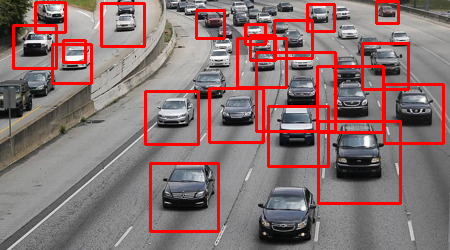

In [8]:
cnt = 0
for (x,y,w,h) in cars:
    cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
    cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)

Now we will use another image i.e. bus image and we will fetch this image from the internet. We will resize the image and store it as a numpy array and also convert it into grayscale.

In [9]:
# Reading image form url
image2 = Image.open(requests.get('https://qph.fs.quoracdn.net/main-qimg-b5c4e39dcd48dddd9e609e6022f74d85', stream=True).raw)
image2 = image2.resize((450,250))
image_arr2 = np.array(image2)
grey2 = cv2.cvtColor(image_arr2,cv2.COLOR_BGR2GRAY)

As we are working with the bus image here so we require the cascade for detecting the bus. We will use Bus_front cascade to identify bus from the image. We will perform similar operation as performed above.

In [10]:
bus_cascade_src = 'Bus_front.xml'
bus_cascade = cv2.CascadeClassifier(bus_cascade_src)
bus = bus_cascade.detectMultiScale(grey2, 1.1, 1)

As we did in car cascading similarly we will be performing the same contour operations on the bus image and create a rectangle around the bus if detected any.

1  bus's found


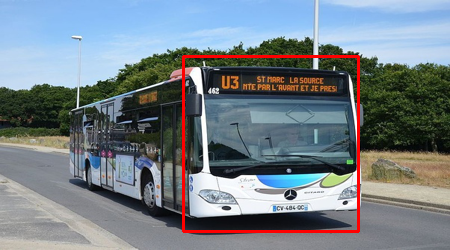

In [11]:
cnt = 0
for (x,y,w,h) in bus:
    cv2.rectangle(image_arr2,(x,y),(x+w,y+h),(255,0,0),2)
    cnt += 1
print(cnt, " bus's found")
Image.fromarray(image_arr2)

Now we will perform the vehicle detection and counting in a video. For creating the output video from frames or images we need cv2.VideoWriter() method. It take path with extension as first parameter, second parameter is the codec for output format, then we also need to pass frames per second and height and width. 

In [12]:
cascade_src = 'cars.xml'
video_src = 'Cars.mp4'

cap = cv2.VideoCapture(video_src)
car_cascade = cv2.CascadeClassifier(cascade_src)
video = cv2.VideoWriter('result.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, (450,250))  

Now we will read frames one by one from the input video, convert them into grayscale and using car cascade to detect all cars in that particular frame. In the end we write this video using video.write() method and video.release() will save this video to the given path. 

In [13]:
while True:
    ret, img = cap.read()
   
    if (type(img) == type(None)):
        break
        
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cars = car_cascade.detectMultiScale(gray, 1.1, 2)

    for (x,y,w,h) in cars:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)

video.write(img) 
video.release()

# Conclusion:

We started with downloading the image we will be working on and performed different operations on that image. We saw how we can use haar cascade which is used for object detection. We saw how different haar cascade is used for car detection, bus detection. Similarly, you can use many pretrained haar cascades for different object detection.

As haar cascade is used for object detection we have a very vast scope for this project. It can be used for any type of object detection. We can also create our own custom haar cascade for specific object.